# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [4]:
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [14]:
male_df =  data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']

male_df.Height.mean()
male_df.Height.std()
male_df.Weight.mean()
male_df.Weight.std()
female_df.Height.mean()
female_df.Height.std()
female_df.Weight.mean()
female_df.Weight.std()

#Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

19.022467805319007

#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

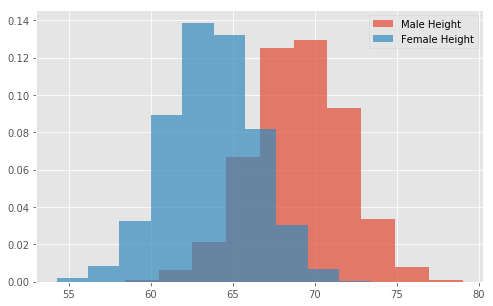

In [19]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.hist(male_df['Height'], bins=10, alpha=0.7, density=True, label='Male Height')
ax.hist(female_df['Height'], bins=10, alpha=0.7, density=True, label='Female Height')
plt.legend()



### Record your observations - are these inline with your personal observations?
Both male and female distributions looks roughly normally distributed, but the means of the populations differ. This is not surprising as women are generally shorter than men, although there is also a lot of overlap in height, which is apparent in the figure and also in line with my anecdotal observations. 



#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density functio

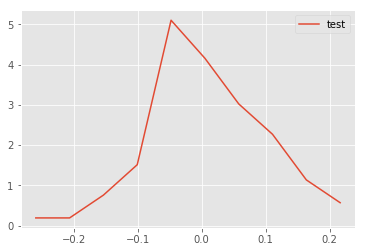

In [20]:
def density(x):
    
    n, bins = np.histogram(x, 10, density = 1)
    # Initialize numpy array with zeros to store interpolated values
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    # Interpolate through histogram bins
    # Identify middle point between two neighboring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    
    # plot the calculated curve
    return pdfx, pdfy

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

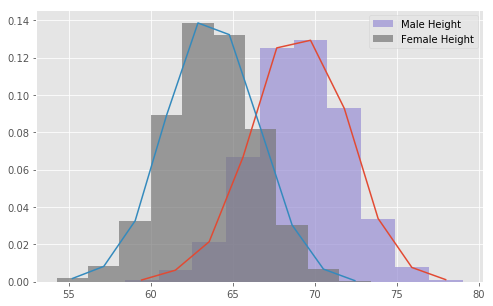

In [21]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
x1, y1 = density(male_df.Height)
x2, y2 = density(female_df.Height)
plt.plot(x1, y1)
plt.plot(x2, y2)
ax.hist(male_df['Height'], bins=10, alpha=0.7, density=True, label='Male Height')
ax.hist(female_df['Height'], bins=10, alpha=0.7, density=True, label='Female Height')
plt.legend()

#### Repeat above exerice for male and female weights

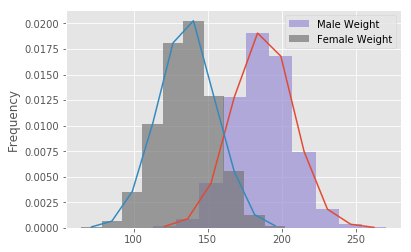

In [27]:
xm, ym = density(male_df.Weight)
xf, yf = density(female_df.Weight)
plt.plot(xm, ym)
plt.plot(xf, yf)

male_df.Weight.plot.hist(bins = 10, density = True,  alpha = 0.7, label ="Male Weight");
female_df.Weight.plot.hist(bins = 10, density = True, alpha = 0.7, label = 'Female Weight')
plt.legend()

#### Write your observations in the cell below.

In [68]:
# Record your observations - are these inline with your personal observations?


# So whats the takeaway when comparing male and female heights and weights 
# Male and female heights and weight appear to correlate and follow the same trends between the sexes. 


#### Repeat Above experiments in seaborn and compare with your results. 

C:\Users\Danyal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Danyal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Comparing Heights')

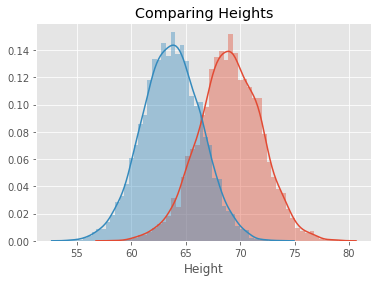

In [28]:
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Comparing Heights')

C:\Users\Danyal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Danyal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Comparing Weights')

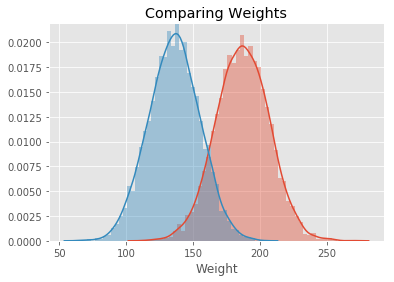

In [29]:
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.title('Comparing Weights')

In [ ]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?

# Seaborn uses significantly less code and has a more polished appearance. 

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.